In [1]:
#local_path = 'C:\Users\Karlc\Desktop\VOGAS';
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from jsonLab_readVolgacore import jsonLab_readVolgacore
from plot_sensor import plot_sensor
import random
from extract_features import exact_feature
import copy

local_path = 'C:/Users/dario/OneDrive/Proyectos_SIRILAND/MatlabToPython_Cuastumal/VOGAS'
db_path = 'test_db/test_01LV'

clin_table = pd.read_csv(f"{local_path}/{db_path}/test_clinic_1.csv", sep = ';', header = 0)
link_table = pd.read_csv(f"{local_path}/{db_path}/test_link_table.csv", sep = ';', header = 0)

#link_table

In [2]:
curid = '01LV0078'
link_row = link_table[link_table.VQ_patientID == curid].VQ_patientID.index.values
link_row

array([ 15,  16, 105, 106], dtype=int64)

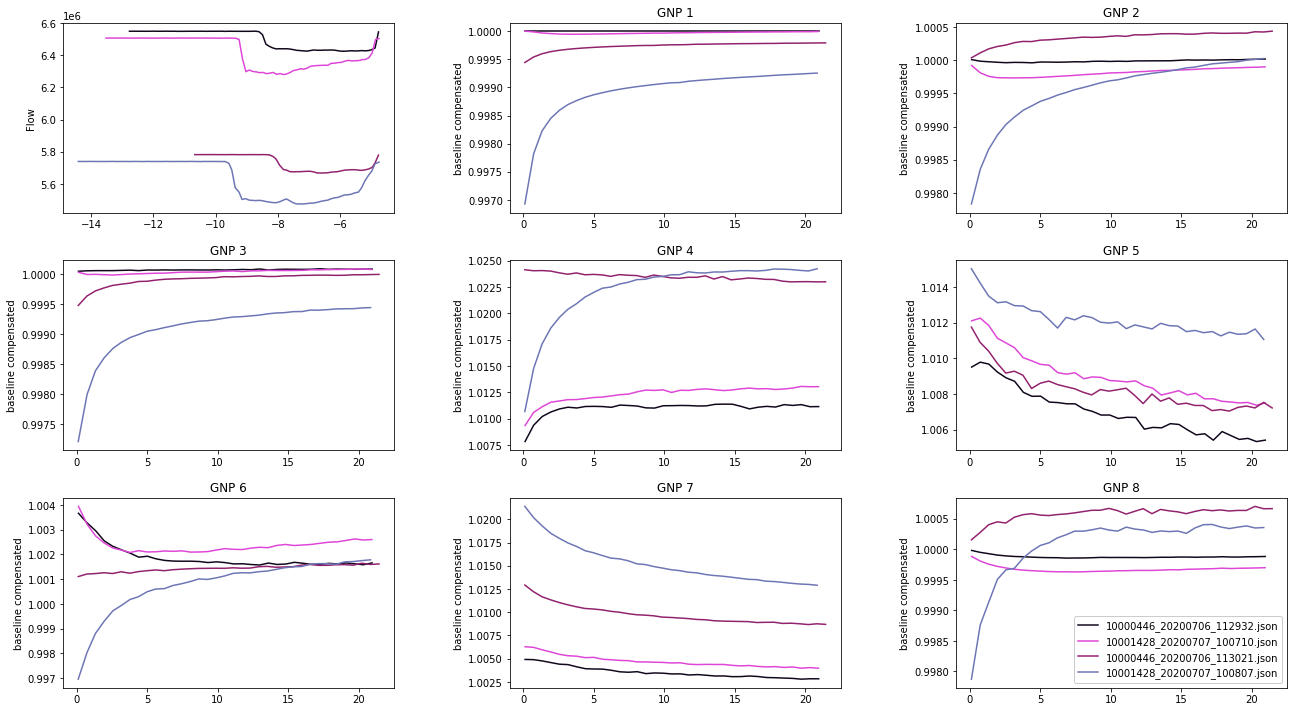

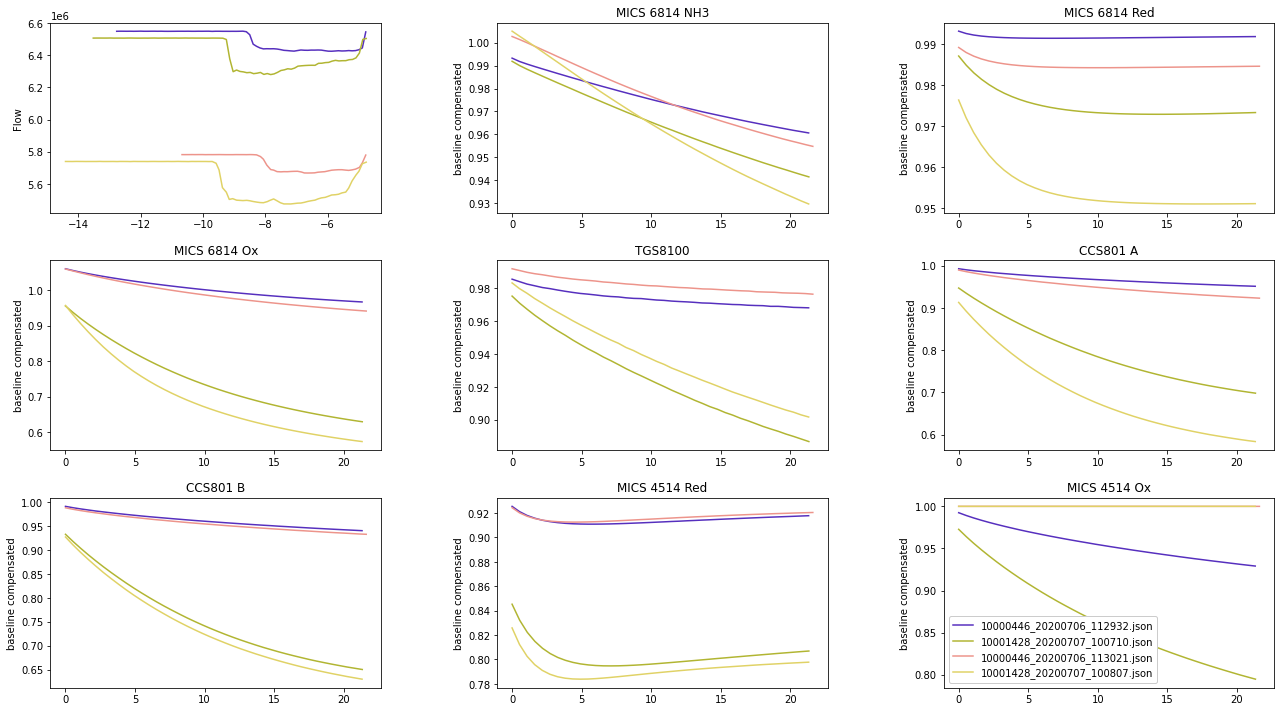

In [3]:
fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(20,11),)

for iidi in link_row:
    this_color = [random.random(), random.random(), random.random()]
    filename = link_table['filename'].iloc[iidi]
    filepath = link_table['folder'].iloc[iidi]

    jsonLabRead = jsonLab_readVolgacore()
    cj = jsonLabRead.read(f'{filepath}/{filename}')
    plot_sensor(cj, filename, fig, this_sensor='GNP', this_color=this_color, legend=True)
plt.show()

fig1, ax1 = plt.subplots(nrows=3, ncols=3,figsize=(20,11),)
for iidi in link_row:
    this_color = [random.random(), random.random(), random.random()]
    filename = link_table['filename'].iloc[iidi]
    filepath = link_table['folder'].iloc[iidi]

    jsonLabRead = jsonLab_readVolgacore()
    cj = jsonLabRead.read(f'{filepath}/{filename}')
    plot_sensor(cj, filename, fig1, this_sensor='MOX analog', this_color=this_color, legend=True)

    
       

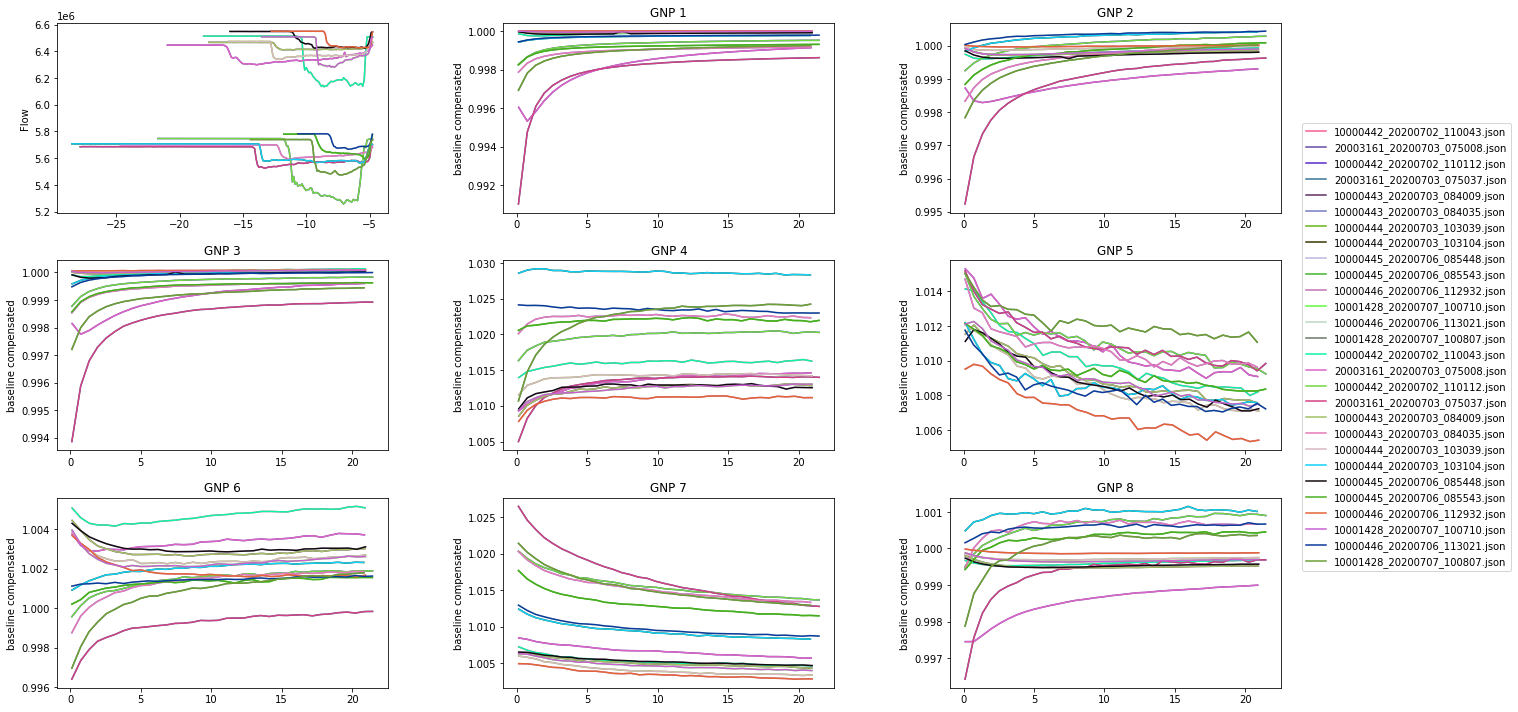

In [4]:
fig2, ax2 = plt.subplots(nrows=3, ncols=3,figsize=(20,11),)
for iigroup in range(1,3):
    currows = np.array(np.where(clin_table.VQ_cancer_group==iigroup))
    #currows[5:] = []; # fasten up the plot by removing most ...
    currows = currows[0][0:5]
    for ii1 in range(len(currows)):
        curid = clin_table['VQ_patientID'][ii1]
        link_row = np.where(link_table.VQ_patientID.values == curid)
        for iidi in range(len(link_row[0])):
            this_color = [random.random(), random.random(), random.random()]
            filepath = link_table.folder[link_row[0][iidi]]
            filename = link_table.filename[link_row[0][iidi]]
            jsonLabRead = jsonLab_readVolgacore()
            cj = jsonLabRead.read(f'{filepath}/{filename}')
            plot_sensor(cj, filename, fig, this_sensor='GNP', this_color=this_color)

plt.show()

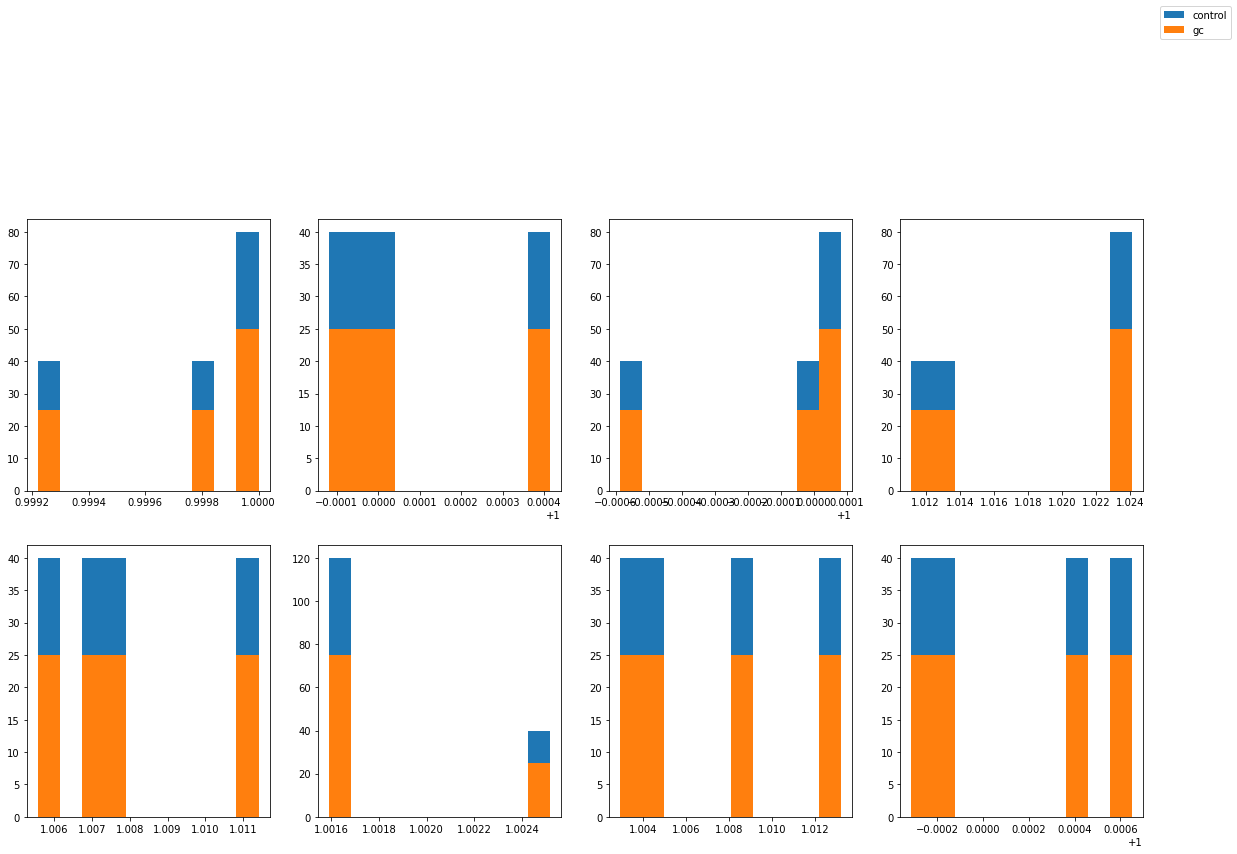

In [5]:
ft = []
cat = np.ones((len(clin_table),8))
cat[:] = np.nan
ft.append(cat)

this_sensor = 'GNP'
for ii in range(len(clin_table)):
    curid = clin_table['VQ_patientID'][ii1]
    link_row = np.where(link_table.VQ_patientID.values == curid)
    for iidi in range(len(link_row[0])):
        filepath = link_table.folder[link_row[0][iidi]]
        filename = link_table.filename[link_row[0][iidi]]
        
        jsonLabRead = jsonLab_readVolgacore()
        cj = jsonLabRead.read(f'{filepath}/{filename}')
        tmpx = exact_feature(cj,this_sensor,'mean_last_5')
        if(len(ft)<iidi+1):
            cat = np.ones((len(clin_table),8))
            cat[:] = np.nan
            ft.append(cat)
            
        ft[iidi][ii,:] = tmpx

ft_cn = []
cat = np.ones((len(clin_table),8))
cat[:] = np.nan
ft_cn.append(cat)
for ii in range(len(clin_table)):
    curid = clin_table['VQ_patientID'][ii]
    link_row = np.where(link_table.VQ_patientID.values == curid)
    for iidi in range(len(link_row[0])):
        if(len(ft_cn)<iidi+1):
            cat = np.ones((len(clin_table),8))
            cat[:] = np.nan
            ft_cn.append(cat)

ft_gc = copy.deepcopy(ft_cn)

ind = np.where(clin_table.VQ_cancer_group==1)
for dimension in range(len(ft)):
    for indice in ind[0]:
        ft_cn[dimension][indice,:] = copy.deepcopy(ft[dimension][indice,:])

ind = np.where(clin_table.VQ_cancer_group==2)
for dimension in range(len(ft)):
    for indice in ind[0]:
        ft_gc[dimension][indice,:] = copy.deepcopy(ft[dimension][indice,:])


fig2, ax2 = plt.subplots(nrows=2, ncols=4,figsize=(20,11))
for iic in range(8):
    plt.subplot(2,4,iic+1)
    cur_cn = np.append(np.array(ft_cn)[0][:,iic], [np.array(ft_cn)[1][:,iic], np.array(ft_cn)[2][:,iic], np.array(ft_cn)[3][:,iic]])
    cur_gc = np.append(np.array(ft_gc)[0][:,iic], [np.array(ft_gc)[1][:,iic], np.array(ft_gc)[2][:,iic], np.array(ft_gc)[3][:,iic]])    
    plt.hist(cur_cn, bins=10, label = 'control')
    plt.hist(cur_gc, bins=10, label = 'gc')
plt.legend(bbox_to_anchor=(1.05, 3), loc='upper left')
plt.show()